# Análise exploratória dos dados da F1 de 1950-2023, ICD  
## Grupo: Gabriel Silva, Gabriel Fonseca, Wilson Fillipe
## Data da apresentação: 01/11/2023

----------------

# Introdução: O trabalho a seguir foi feito a partir de um dataset disponibilizado no site kaggle, ele junta todos os dados da Fórmula 1 desde 1950 em 14 arquivos .csv, dos quais usamos apenas os necessários para exibir os dados essenciais para uma exposição. 

## Nós fizemos os questionamentos visando um entendimento geral no assunto que é a F1, um esporte não tão fácil de entender para alguém que não acompanha, tentamos exibir os dados mais importantes de maneira compreensível até para quem não assiste o esporte.  

### -Introdução, Pilotos atuais e históricos, pistas, campeões e campeonatos.
###  -Como a análise de dados mudou o esporte ao longo do tempo, coisas que impactaram o esporte de maneira geral
### -E por último algumas demonstrações de análises de dados mais específicas



------------------

# - Início do tratamento de dados: 

1. Importar as bibliotecas necessárias; 
2. Fazer o primeiro tratamento dos dados necessários;
3. Primeira exposição de dados referente as idades dos pilotos de F1 atuais; 
4. Medidas de dispersão com dados dos pilotos; 
5. Análise técnica e gráficos das equipes de F1.

# 1- Importando as bibliotecas: 

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

import seaborn as sns 

# 1.1- Primeira visualização de dados para confirmar se está tudo certo:

In [55]:
drivers = pd.read_csv('drivers.csv') 
results = pd.read_csv('results.csv')  
season = pd.read_csv('seasons.csv') 
races = pd.read_csv('races.csv')
driver_standing = pd.read_csv('driver_standings.csv') 
constructor_standings = pd.read_csv('constructor_standings.csv')

df = pd.read_csv('constructors.csv')

In [56]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [57]:
drivers.columns 

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [58]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [59]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [60]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [61]:
races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

# 2- Definindo os dados necessários para a análise de idades dos pilotos: 

## 2.1- Merge em um único dataset para melhor visualização 

In [62]:
ds = pd.merge(results,races[['raceId','year','name','round','date']],on = 'raceId',how = 'left')
ds =pd.merge(ds,drivers[['driverId','driverRef','forename','surname','nationality','dob']],on='driverId',how='left')
pd.get_option("display.max_columns",None)

20

In [63]:
ds

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,year,name,round,date,driverRef,forename,surname,nationality,dob
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008,Australian Grand Prix,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008,Australian Grand Prix,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008,Australian Grand Prix,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008,Australian Grand Prix,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,1,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,130,2023,Belgian Grand Prix,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01


# 2.3- Deixando de lado algumas colunas que não vamos utilizar 

In [64]:
ds.drop(['resultId', 'constructorId', 'number','position','positionText','statusId','driverId', 'grid' ],axis =1,inplace = True)

In [65]:
ds

,raceId,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,year,name,round,date,driverRef,forename,surname,nationality,dob
0,18,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07
1,18,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10
2,18,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27
3,18,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29
4,18,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01
26076,1110,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,2023,Belgian Grand Prix,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31
26077,1110,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19
26078,1110,19,0.0,23,\N,\N,9,19,1:53.138,222.864,2023,Belgian Grand Prix,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01


# 2.4- Renomeando as colunas essenciais 

In [66]:
ds.rename(columns = {'rank':'Volta_mais_rapida','name_x':'gp_nome','nationality_x':'país_do_piloto',
                    'name_y':'nome_equipe','nationality_y':'país_equipe','driverRef':'piloto', 'driver' : 'Piloto', 'nationality' : 'país'},inplace = True)
ds

,raceId,positionOrder,points,laps,time,milliseconds,fastestLap,Volta_mais_rapida,fastestLapTime,fastestLapSpeed,year,name,round,date,piloto,forename,surname,país,dob
0,18,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07
1,18,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10
2,18,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27
3,18,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29
4,18,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01
26076,1110,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,2023,Belgian Grand Prix,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31
26077,1110,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19
26078,1110,19,0.0,23,\N,\N,9,19,1:53.138,222.864,2023,Belgian Grand Prix,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01


In [67]:
ds['Piloto_nome']=ds['forename']+ ' '+ ds['surname']
ds.drop(['forename','surname'],axis=1,inplace=True)

In [68]:
ds.head()

,raceId,positionOrder,points,laps,time,milliseconds,fastestLap,Volta_mais_rapida,fastestLapTime,fastestLapSpeed,year,name,round,date,piloto,país,dob,Piloto_nome
0,18,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,2008-03-16,hamilton,British,1985-01-07,Lewis Hamilton
1,18,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,2008-03-16,heidfeld,German,1977-05-10,Nick Heidfeld
2,18,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,2008-03-16,rosberg,German,1985-06-27,Nico Rosberg
3,18,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,2008-03-16,alonso,Spanish,1981-07-29,Fernando Alonso
4,18,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Finnish,1981-10-19,Heikki Kovalainen


   
   # 3- Aqui na próxima célula definimos a nova coluna "idade" e fizemos um cálculo a partir da coluna já existente "dob" (day of birth) para saber a idade atual do piloto
   
   

In [69]:
pd.to_datetime(ds.dob)
ds['dob'] = pd.to_datetime(ds['dob'])
dates = datetime.today()-ds['dob']
idade = dates.dt.days/365
ds['idade'] = round(idade)

In [70]:
ds

,raceId,positionOrder,points,laps,time,milliseconds,fastestLap,Volta_mais_rapida,fastestLapTime,fastestLapSpeed,year,name,round,date,piloto,país,dob,Piloto_nome,idade
0,18,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,2008,Australian Grand Prix,1,2008-03-16,hamilton,British,1985-01-07,Lewis Hamilton,39.0
1,18,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,2008,Australian Grand Prix,1,2008-03-16,heidfeld,German,1977-05-10,Nick Heidfeld,47.0
2,18,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,2008,Australian Grand Prix,1,2008-03-16,rosberg,German,1985-06-27,Nico Rosberg,38.0
3,18,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,2008,Australian Grand Prix,1,2008-03-16,alonso,Spanish,1981-07-29,Fernando Alonso,42.0
4,18,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,2008,Australian Grand Prix,1,2008-03-16,kovalainen,Finnish,1981-10-19,Heikki Kovalainen,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,2023,Belgian Grand Prix,12,2023-07-30,ricciardo,Australian,1989-07-01,Daniel Ricciardo,34.0
26076,1110,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,2023,Belgian Grand Prix,12,2023-07-30,sargeant,American,2000-12-31,Logan Sargeant,23.0
26077,1110,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,2023,Belgian Grand Prix,12,2023-07-30,hulkenberg,German,1987-08-19,Nico Hülkenberg,36.0
26078,1110,19,0.0,23,\N,\N,9,19,1:53.138,222.864,2023,Belgian Grand Prix,12,2023-07-30,sainz,Spanish,1994-09-01,Carlos Sainz,29.0




# 3.1- Aqui na próxima célula fizemos um novo data frame para mostrar os 20 pilotos mais jovens da F1 com as idades atualizadas para o dia atual. 

## Tambem é possível ver que só existe um brasileiro entre os 20, Pietro Fittipaldi, com 27 anos.  



In [71]:
pilotos_novos = ds.sort_values(by='dob', ascending=False).drop_duplicates(subset='Piloto_nome')[:25]
pilotos_novos = pilotos_novos[['Piloto_nome', 'idade', 'país']]
pilotos_novos = pilotos_novos.reset_index(drop=True)
print(pilotos_novos.to_string(index=False))

       Piloto_nome  idade       país
     Oscar Piastri   23.0 Australian
    Logan Sargeant   23.0   American
      Yuki Tsunoda   23.0   Japanese
      Lando Norris   24.0    British
       Guanyu Zhou   24.0    Chinese
   Mick Schumacher   25.0     German
    Nikita Mazepin   25.0    Russian
      Lance Stroll   25.0   Canadian
    George Russell   26.0    British
   Charles Leclerc   26.0 Monegasque
    Max Verstappen   26.0      Dutch
      Esteban Ocon   27.0     French
 Pietro Fittipaldi   27.0  Brazilian
   Alexander Albon   28.0       Thai
      Pierre Gasly   28.0     French
       Jack Aitken   28.0    British
   Sergey Sirotkin   28.0    Russian
   Nicholas Latifi   28.0   Canadian
     Nyck de Vries   29.0      Dutch
   Pascal Wehrlein   29.0     German
      Carlos Sainz   29.0    Spanish
      Daniil Kvyat   30.0    Russian
Antonio Giovinazzi   30.0    Italian
      Rio Haryanto   31.0 Indonesian
   Kevin Magnussen   31.0     Danish


In [72]:
#definindo alguns atributos para o proximo dataframe
ds["dob"] = pd.to_datetime(ds["dob"])
ds["date"] = pd.to_datetime(ds["date"])

In [73]:
#aqui é apenas para não repetir o mesmo piloto no dataset 
unique_drivers = ds.drop_duplicates(subset='Piloto_nome')

simplified_df = ds[ds['date'].dt.year == 2023][['Piloto_nome', 'idade']]
unique_drivers = simplified_df['Piloto_nome'].unique()
ages_by_driver = [simplified_df[simplified_df['Piloto_nome'] == driver]['idade'].values for driver in unique_drivers]

# 4- Na próxima célula vemos a quantidade de pilotos na temporada de 2023 e as suas idades 

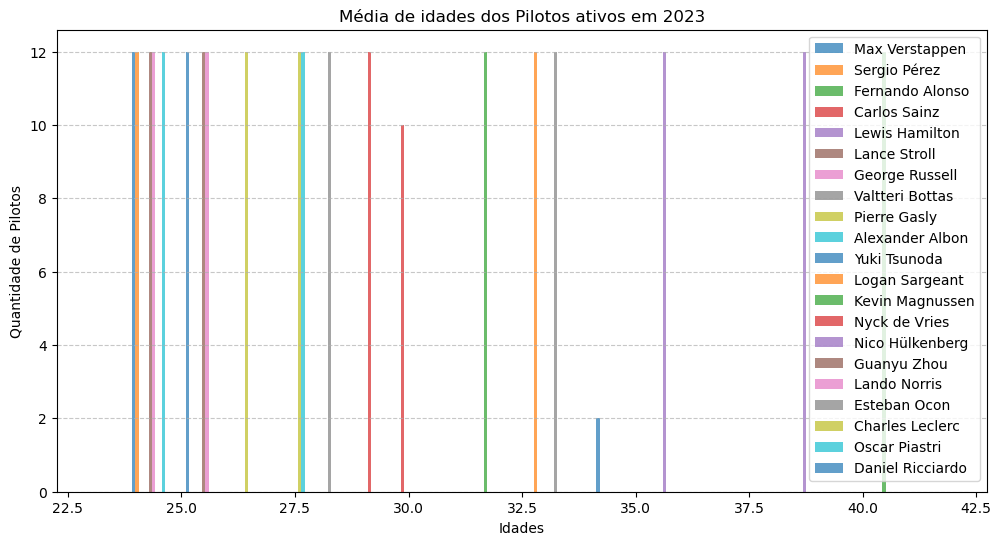

In [74]:
#aqui é como foi feito o gráfico de barras
plt.figure(figsize=(12, 6))
plt.hist(ages_by_driver, bins=10, alpha=0.7, label=unique_drivers)
plt.xlabel('Idades')
plt.ylabel('Quantidade de Pilotos')
plt.title('Média de idades dos Pilotos ativos em 2023')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Aqui nós podemos definir também que a idade média dos pilotos de F1 é de 26 anos.



------------------------

# 5- No próximo passo iremos mostrar os países mais comuns de nacionalidade dos pilotos de F1: 

In [75]:

piloto_country = ds.groupby('país').Piloto_nome.nunique().reset_index() 
piloto_country1 = piloto_country[piloto_country.Piloto_nome >= 30].sort_values('Piloto_nome' ,ascending = False )
piloto_country1.loc[len(piloto_country1.index)] = ['Others', (piloto_country.Piloto_nome.sum() - piloto_country1.Piloto_nome.sum())]

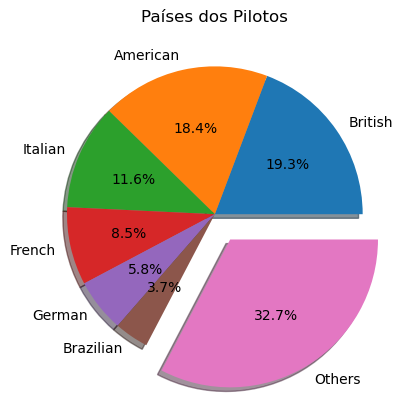

In [82]:
#Aqui apenas o plot do gráfico de pizza ou "pie", usando a biblioteca matplotlib

plt.title('Países dos Pilotos')
pizza = [0,0,0,0,0,0,0.2]
plt.pie(piloto_country1.Piloto_nome, labels= piloto_country1.país, autopct='%1.1f%%', explode= pizza, shadow=True, startangle=360 );

# Os pilotos da Europa são a maioria na F1, representando cerca de 70% dos pilotos. 

----------------------------------

# 6- Agora trabalhando com os dados das equipes de F1: 

In [134]:
df.columns
df.drop(['url','constructorRef'],axis=1,inplace=True)
df

KeyError: "['url', 'constructorRef'] not found in axis"

# 6.1- Na célula abaixo fizemos o gráfico de pizza mostrando os países das equipes de F1 

In [78]:
equipes_pais = df.groupby('nationality').name.nunique().reset_index()
equipes_pais = equipes_pais.rename(columns ={'name':'constructor_counts'})
equipes_pais1 = equipes_pais[equipes_pais.constructor_counts >= 9].sort_values('constructor_counts', ascending = False)

equipes_pais1.loc[len(equipes_pais1.index)+1] = ['Others', (equipes_pais.constructor_counts.sum() - equipes_pais1.constructor_counts.sum())]

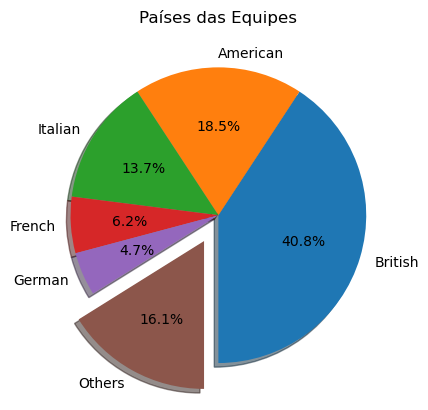

In [79]:
plt.title('Países das Equipes')

myexplode1 = [0,0,0,0,0,0.2]

plt.pie(equipes_pais1.constructor_counts, labels = equipes_pais1.nationality, autopct='%1.1f%%', explode= myexplode1, shadow=True, startangle=270);

# Assim como a nacionalidade dos pilotos, as equipes predominantes são de origens britânicas 

----------------------

# 7- Agora para um gráfico de barras, as 10 equipes com mais pontos em corridas em toda a história da F1: 

In [136]:
top_equipes = pd.merge(constructor_standings, df, on='constructorId')
top_equipes = top_equipes.groupby('nome')['points'].sum()
top_equipes = top_equipes.sort_values(ascending=False).head(10)

KeyError: 'constructorId'

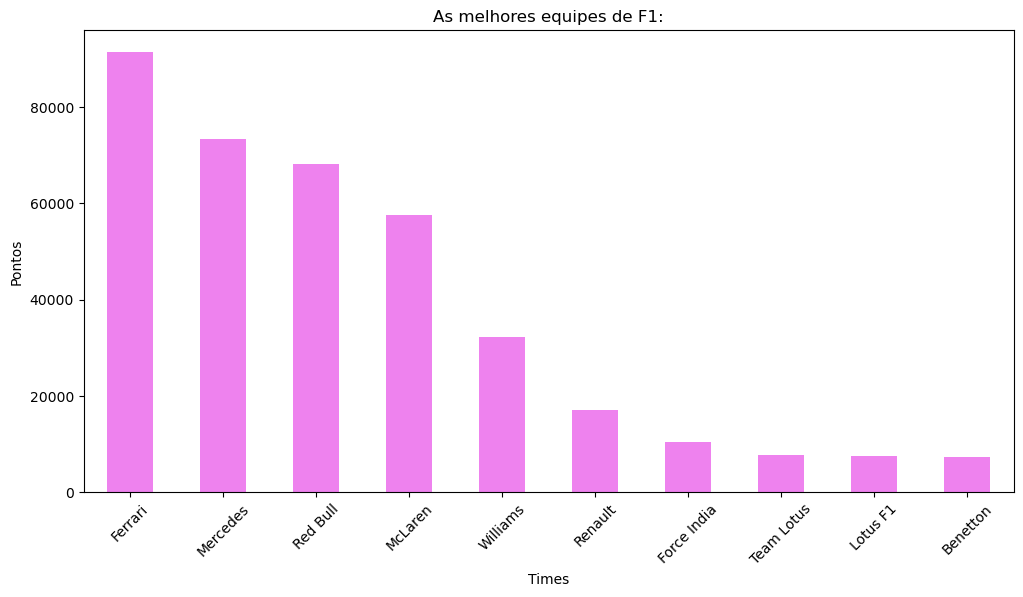

In [132]:
plt.figure(figsize=(12, 6))
top_equipes.plot(kind='bar', color='violet')
plt.xlabel('Times')
plt.ylabel('Pontos')
plt.title('As melhores equipes de F1:')
plt.xticks(rotation=45)
plt.show()

------------------------------------

# 8- Aqui fizemos mais um gráfico, dessa vez mostrando os 10 pilotos com maior número de corridas da F1 

In [128]:
mais_corridas = ds.groupby('Piloto_nome')[['raceId']].count().reset_index()
mais_corridas = mais_corridas.sort_values('raceId', ascending= False).head(10)
mais_corridas = mais_corridas.rename(columns ={'raceId': 'corridas_totais'})

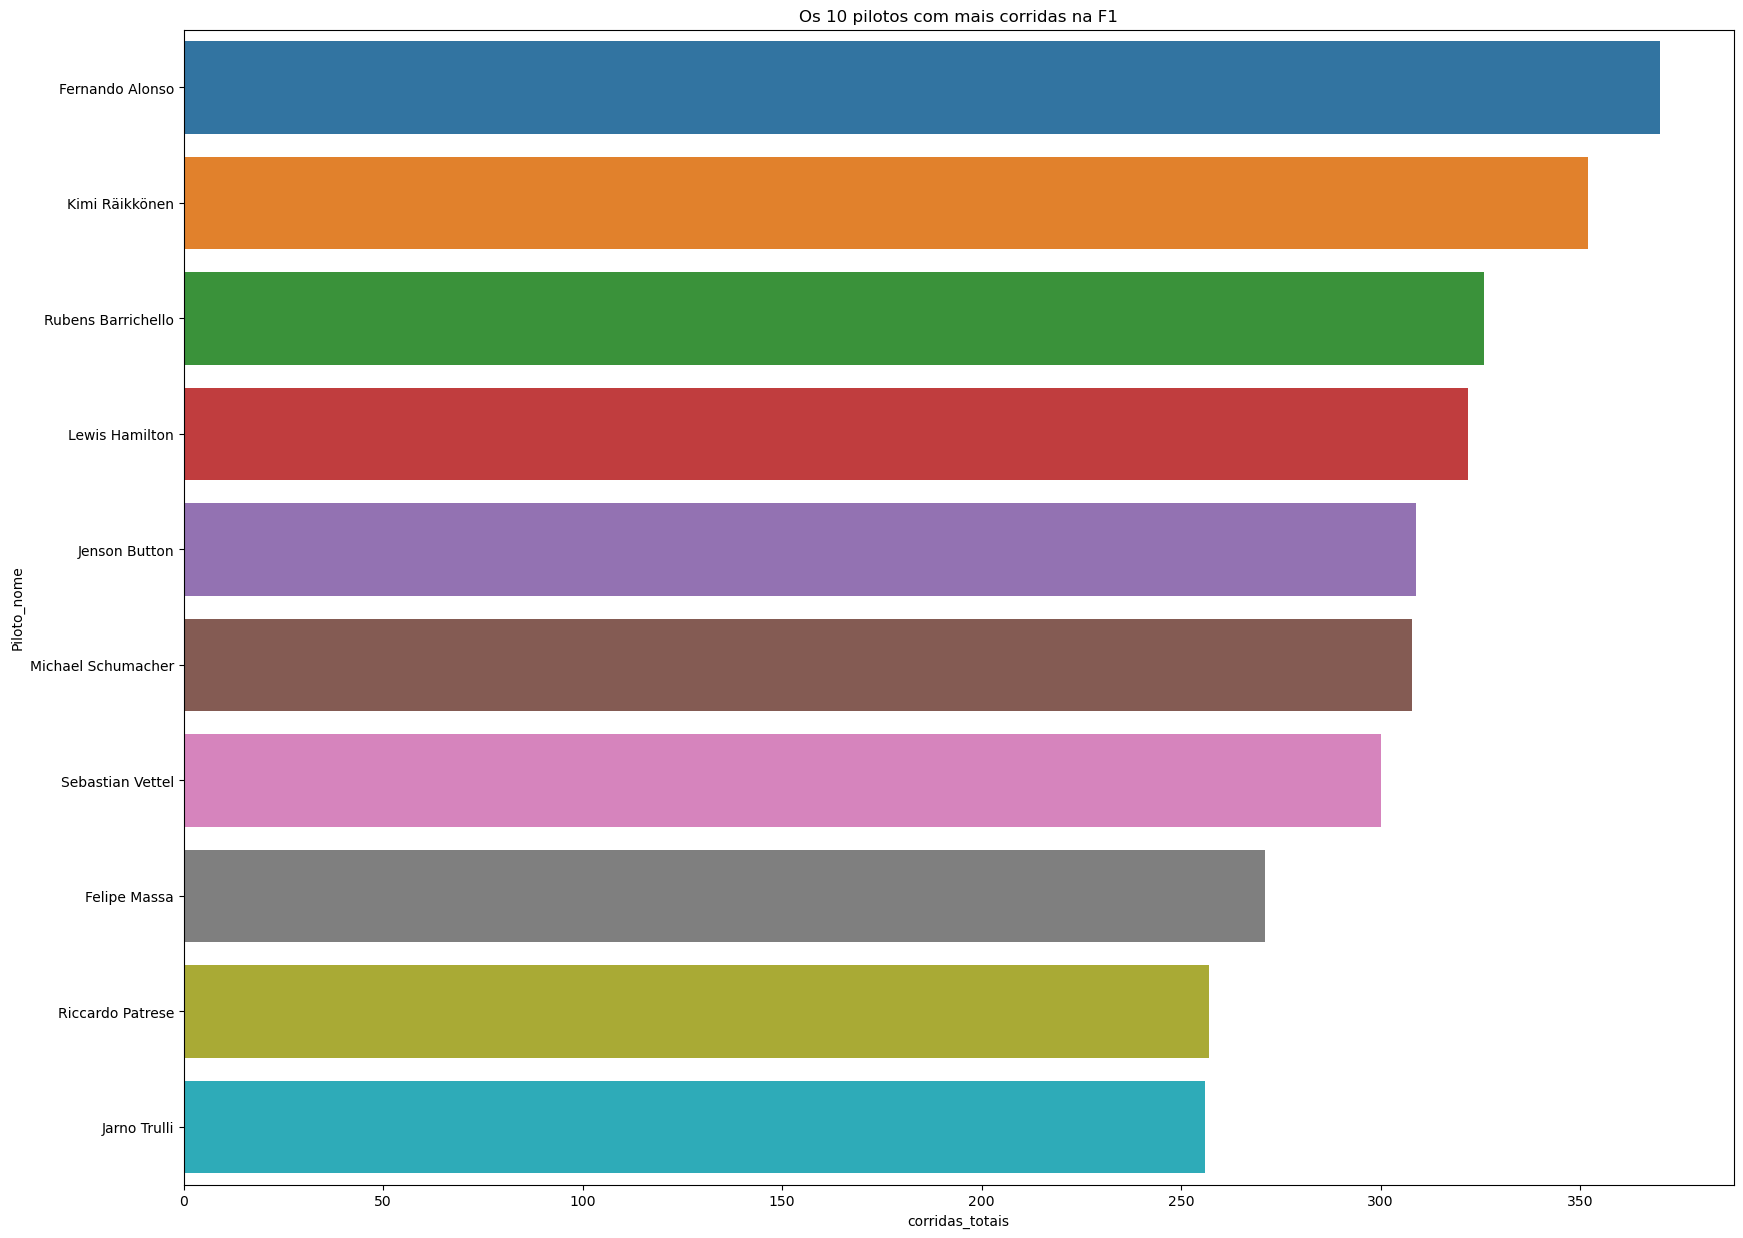

In [129]:
plt.figure(figsize = (20,15))
plt.title('Os 10 pilotos com mais corridas na F1')
sns.barplot(x = 'corridas_totais' , y = 'Piloto_nome' , data = mais_corridas );

# É interessante visualizar como alguns pilotos com maior número de corridas já são aposentados e outros como o Fernando Alonso ainda correm nos dias de hoje, a idade é algo muito importante no esporte, mas na F1 ainda é possível se destacar sendo mais velho 

-------------------------------------

# Conclusão da pesquisa: 



## O trabalho teve como objetivo principal a análise de dados da Fórmula 1 e responder algumas questões citadas no início, também foi possível entender o desempenho das equipes e pilotos, identificar tendências e oportunidades de melhoria dentro do esporte. 

## Algumas comparações feitas com pilotos antigos e atuais demonstram a similaridade de performance em alguns casos e a discrepância de alto desempenho de alguns pilotos, a idade sendo fator determinante para alguns pilotos e para outros como Fernando Alonso apenas um número que não limita o seu potencial. 

## Os países predominantes da F1 indicam que o esporte automobilístico depende de muita infraestrutura e tecnologia, visto que apenas países mais desenvolvidos economicamente participam de maneira ativa e têm bons resultados no geral. Sendo a Europa que compõe 70% de participação na F1 na questão da nacionalidade dos pilotos. 

## O trabalho também foi importante não só no quesito de melhorar a nossa análise de dados, mas também na parte de resolver problemas em equipe, esse assunto da Fórmula 1 foi o segundo assunto do grupo escolhido para fazer o trabalho, tentamos antes com outro assunto relacionado aos "Tipos de trabalhos na área de Data science no Brasil", mas não conseguimos seguir em frente por causa de vários problemas que tivemos com os datasets e quantidade de informação bangunçada. Por isso tivemos que atrasar um pouco a entrega das fases, porque nós trocamos completamente o assunto do trabalho e fizemos outro do zero que foi esse e deu mais que certo. Aprendemos muito além do conteúdo de programação como no esporte em si, estamos cientes que ainda há muito o que melhorar, mas esse foi com certeza um ótimo começo na área de ciência de dados! Obrigado por ler até aqui. 